# ABC Tech ITSM Project for priority tickets classification

# Problem Statement

ABC Tech is an mid-size organisation operation in IT-enabled business segment over a decade. On an average ABC Tech receives
22-25k IT incidents/tickets, which were handled to best practice ITIL framework with incident management, problem management,
change management and configuration management processes. These ITIL practices attained matured process level and a recent 
audit confirmed that further improvement initiatives may not yield return of investment. ABC Tech management is looking for
ways to improve the incident management process as recent customer survey results shows that incident management is rated as
poor.Total of about 46k records from year 2012,2013,2014 that they can take preventive measures or fix the problem before

1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so it surfaces. 
2. Forecast the incident volume in different fields , quarterly and annual.So that they can be better prepared with resources      and technology planning. 
3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced. 
4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

# About Dataset

This project belongs to ABC technologies, where the company wanted to include the ML algorithms for the automatic prediction
of priority tickets. Data needs to be queried from MYSQL data base (Read Only Access).

# Description

## Business Case Description:

ABC Tech is an established mid-sized organization operating in the IT-enabled business sector for over a decade. They manage
a significant volume of IT incidents and tickets, averaging between 22,000 to 25,000 per year. ABC Tech follows best practices
in IT Service Management (ITSM), including incident management, problem management, change management, and configuration management processes. These ITIL practices have matured over time, reaching a high level of process maturity.

Recently, ABC Tech conducted an audit that indicated that further improvement initiatives in their ITSM processes may not provide a sufficient return on investment (ROI). Despite their mature processes, customer feedback from recent surveys has revealed that incident management, in particular, is rated poorly, suggesting there is room for enhancement.

In response to these challenges, ABC Tech's management has decided to explore the potential of machine learning (ML) to enhance
their ITSM processes. After attending a Machine Learning conference focused on IT Service Management (ITSM), they identified four key areas where ML can contribute to improving ITSM processes within the organization:

1. Predicting High Priority Tickets: ABC Tech aims to develop an ML model that can predict high-priority tickets, specifically 
   those categorized as priority 1 and 2. This prediction will allow them to take proactive measures to address issues or          incidents before they escalate.
2. Forecasting Incident Volume: The organization plans to use ML to forecast the incident volume in different fields on a          quarterly and annual basis. This predictive capability will help them better allocate resources and plan for the required        technology upgrades.
3. Auto-Tagging Tickets: ABC Tech intends to implement a text classification ML model to automatically assign correct priorities    and departments to incoming tickets. This automation will reduce reassignment and related delays in ticket handling.
4. Predicting RFC and ITSM Asset Misconfigurations: The organization aims to create predictive models for Request for Change        (RFC) and detect potential failures or misconfigurations in ITSM assets. Identifying these issues in advance will help in        preventing disruptions and improving overall ITSM asset management.

# Workflow of the project

1. Reading the data from server
2. Saving the data into a local drive
3. Analysing the data & Exploratory Data Analysis
4. Data Cleaning and Data preprocessing
5. Modeling
The project is done with the purpose of:

Finding out factors which affects priority and training a model which accurately predicts it so that preventive measures can
be taken for High Priority Tickets and reassigning can be reduced. Finding out factors which affect RFC and predicting it. 
Forecasting Incident Volume in the future so that they can be better prepared with resources and technology planning.

The analysis is done in three parts:
1. Predicting Priorities
2. Predicting Request for Change (RFC)
3. Forecasting the Incident Volume

# Business Case-1

## Predicting High Priority Tickets

#### ExTract the Data From MYSQL

In [1]:
!pip install pymysql
!pip install mysql-connector

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


#### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import warnings
warnings.filterwarnings('ignore')

In [3]:
## making connections to database server
connection= mysql.connector.connect(host='18.136.157.135',user='dm_team',password='DM!$Team@&27920!')

In [4]:
## Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_itsm',)


In [5]:
## connecting the database  (configure to initiate the connection to mysql)
connection=mysql.connector.connect(host='18.136.157.135',user='dm_team',password='DM!$Team@&27920!',
                                   database='project_itsm')

In [6]:
# view tables present in datamites_sql db
db_tables=pd.read_sql('show tables',connection)
print(db_tables)

  Tables_in_project_itsm
0           dataset_list


In [7]:
# retriving dataset_list table
query="select * from dataset_list"
df = pd.read_sql(query,connection)
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


In [8]:
df.shape

(46606, 25)

### Basic Checks

In [9]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [10]:
df.tail()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3,0.902319509,...,,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1,SD0147088,,,


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [12]:
pd.set_option('display.max_columns',None)

In [13]:
df.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,4,1825,1,42,34636,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,incident,KM0001106,closed,0,24-03-2014 08:54,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,37748,1106,46606,27468,7,44322,1780,21,236,16470,43058,3434,45384,46046,46046


Incident_ID,number_cnt are unique features

## Attribute Information

The dataset that ABC Tech plans to use for these ML initiatives comprises a total of approximately 46,000 records spanning
the years 2012, 2013, and 2014. The data is stored in a MySQL database with read-only access, and the relevant connection 
details are provided.

Here's a summary of some key fields in the dataset:

- CI_Name: Configuration Item Name
- CI_Cat: Configuration Item Category
- CI_Subcat: Configuration Item Subcategory
- WBS : WBSE Could be the department or equivalently a charge code for using the CI service.
- Incident_ID: Incident Identifier
- Status: Incident Status (e.g., Closed)
- Impact: Impact level
- Urgency: Urgency level
- Priority: Incident Priority
- Category: Incident Category
- KB_number: Knowledge Base Number
- Alert_Status: Alert Status
- No_of_Reassignments: Number of Reassignments
- Open_Time: Incident Open Time
- Reopen_Time: Incident Reopen Time
- Resolved_Time: Incident Resolved Time
- Close_Time: Incident Close Time
- Handle_Time_hrs: Time taken to handle the incident (in hours)
- Closure_Code: Code for incident closure
- No_of_Related_Interactions: Number of Related Interactions
- Related_Interaction: Identifier for Related Interaction
- No_of_Related_Incidents: Number of Related Incidents
- No_of_Related_Changes: Number of Related Changes
- Related_Change: Identifier for Related Change

# Domain Analysis

Certainly! Domain analysis is an essential step in any data science or machine learning project. It involves gaining a deep 
understanding of the domain-specific aspects of the problem you're trying to solve. In this case, we're analyzing the domain
of IT Service Management (ITSM) within the context of ABC Tech's business case. Here's a domain analysis for ITSM:

#### 1. IT Service Management (ITSM):

- **Definition:**  IT Service Management (ITSM) refers to a set of practices and processes used by organizations to design,                        deliver, manage, and improve IT services for their customers and end-users.
- **Importance:** ITSM ensures that IT services are aligned with business goals, reliable, and efficiently delivered, leading to
              enhanced customer satisfaction and business performance.
#### 2. Incident Management:

- **Definition:** Incident Management is a core ITSM process that involves identifying, categorizing, prioritizing, and resolving
              incidents to restore normal service operations as quickly as possible.
- **Challenges:** Common challenges in incident management include handling a high volume of incidents, determining incident                       priorities, minimizing response times, and reducing the impact on end-users.
#### 3. Priority in ITSM:

- **Definition:** Priority is a classification system used to categorize incidents based on their severity and impact on business
              operations. In ITIL (IT Infrastructure Library) framework, there are typically four priority levels: Priority 1                 (Critical), Priority 2 (High), Priority 3 (Medium), Priority 4 (Low) and Priority 5 (Very low).
- **Importance:** Prioritizing incidents helps organizations allocate resources effectively and respond to critical issues promptly.
#### 4. ITIL Framework:

- **Definition:** ITIL is a widely adopted framework for ITSM that provides best practices and guidelines for managing IT services, 
              including incident management, problem management, change management, and configuration management.
- **Maturity Levels:** ITIL processes can mature over time, starting from ad-hoc practices and progressing to well-defined,                            controlled, and optimized processes. A mature ITIL framework leads to improved service quality and                              efficiency.
#### 5. Machine Learning in ITSM:

- **Application:** Machine learning can be applied to ITSM processes to predict incidents, automate ticket classification, forecast
               resource needs, and detect anomalies or misconfigurations in IT assets.
- **Benefits:** ML can enhance incident response, reduce manual workload, improve service quality, and proactively identify issues
            before they impact operations.
#### 6. Data Considerations:

- **Data Sources:** Data for ITSM projects typically come from various sources, including incident tracking systems, service logs,
                configuration databases, and customer feedback.
- **Data Quality:** Data quality is critical, as inaccurate or incomplete data can lead to incorrect predictions and decisions.
- **Privacy and Compliance:** ITSM data often contains sensitive information, so privacy and compliance with data protection                                   regulations (e.g., GDPR) are crucial considerations.
#### 7. Metrics and KPIs:

- **Key Metrics:** Key Performance Indicators (KPIs) in ITSM include Mean Time to Resolve (MTTR), Incident Response Time, Incident
               Closure Rate, and Customer Satisfaction.
- **Monitoring:** Continuous monitoring of KPIs helps organizations assess the effectiveness of their ITSM processes and make 
              improvements.
#### 8. Stakeholders:

- **Internal Stakeholders:** IT teams, IT managers, incident responders, change management teams.
- **External Stakeholders:** End-users, customers, auditors (for compliance).
#### 9. Challenges:

- **Scalability:** Handling a large volume of incidents efficiently can be challenging.
- **Data Integration:** Integrating data from disparate sources can be complex.
- **Change Management:** Implementing ML solutions may require organizational and cultural changes.
    

In [14]:
df.dtypes

CI_Name                       object
CI_Cat                        object
CI_Subcat                     object
WBS                           object
Incident_ID                   object
Status                        object
Impact                        object
Urgency                       object
Priority                      object
number_cnt                    object
Category                      object
KB_number                     object
Alert_Status                  object
No_of_Reassignments           object
Open_Time                     object
Reopen_Time                   object
Resolved_Time                 object
Close_Time                    object
Handle_Time_hrs               object
Closure_Code                  object
No_of_Related_Interactions    object
Related_Interaction           object
No_of_Related_Incidents       object
No_of_Related_Changes         object
Related_Change                object
dtype: object

In [15]:
df.duplicated().sum()

0

We don't have any duplicate values.

# Basic Checks Report:

### Overview:

When working with IT Service Management (ITSM) data or any dataset, it's essential to perform basic data checks to ensure the
quality and integrity of the data. These basic checks help identify issues early on and ensure that your analysis or project 
is based on reliable data.

**Data Shape:** We Check the dimensions of the dataset, i.e., the number of rows and columns, using data.shape. Data Contains 46606 Rows and 25 columns.
**Data Types:** We Verified that the data types of each column are as expected usingdata.dtypes.columns, all are in object.

**Descriptive Statistics:** We Used data.describe(include='O') for a summary of categorical columns.

The goal is to ensure that our data is clean, complete, and suitable for analysis or further processing.

# Exploratory Data Analysis (EDA)

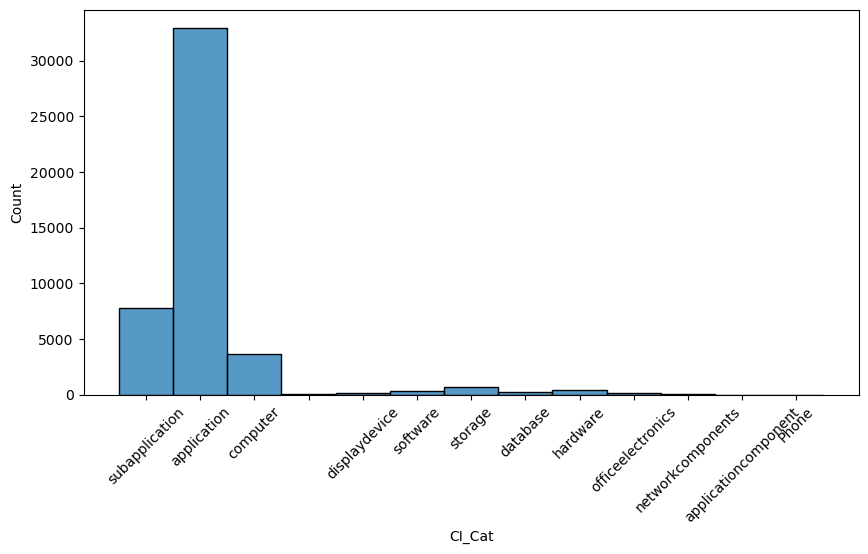

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df.CI_Cat)
plt.xticks(rotation=45)
plt.show()

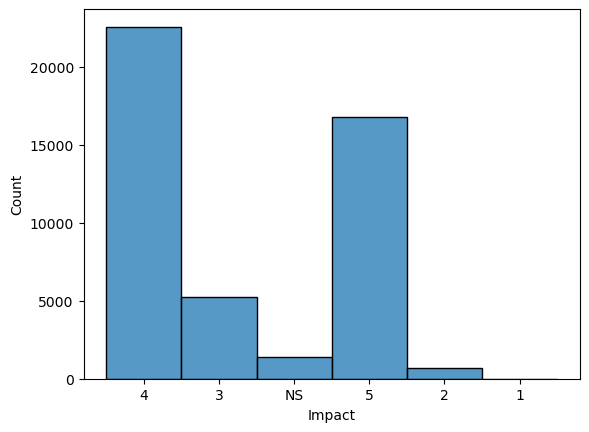

In [17]:
sns.histplot(df.Impact)
plt.show()

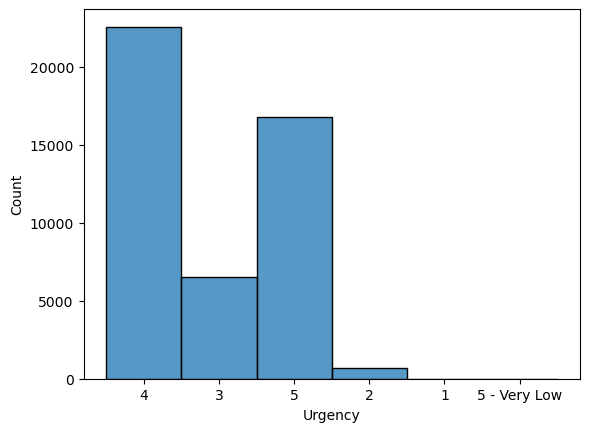

In [18]:
sns.histplot(df.Urgency)
plt.show()

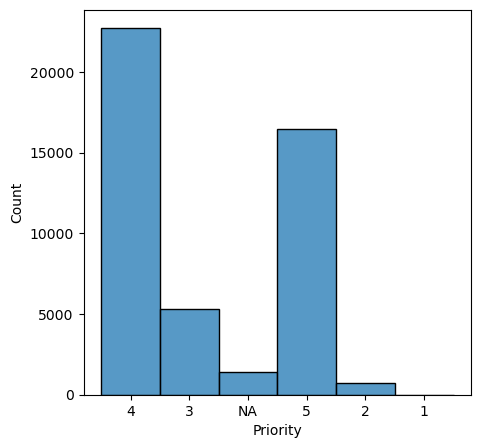

In [19]:
plt.figure(figsize=(5,5))
sns.histplot(df.Priority)
plt.show()

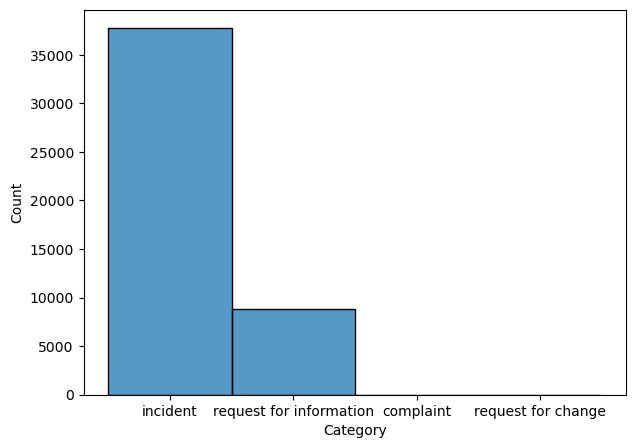

In [20]:
plt.figure(figsize=(7,5))
sns.histplot(df.Category)
plt.show()

In [21]:
from matplotlib import rcParams

### Basic Pie chart of outcome variable

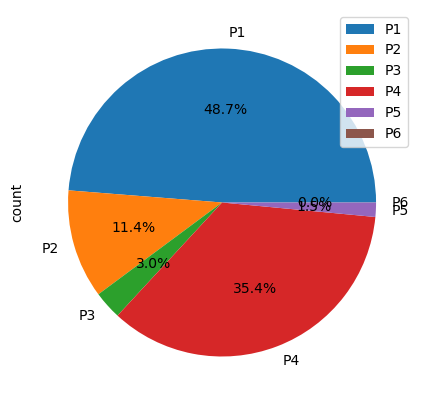

In [22]:
rcParams['figure.figsize'] =15,5
df.Priority.value_counts(sort=False).plot.pie(labels=["P1","P2",'P3','P4','P5','P6'],legend = True, autopct='%1.1f%%',shadow=False)
plt.show()

# Data Preprocessing

In [23]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


Droping unwanted features which do not contribute in predicting target feature

In [24]:
df.drop(labels=['Status','number_cnt','number_cnt','KB_number','Alert_Status','No_of_Reassignments',
         'Reopen_Time','Resolved_Time','Close_Time','Handle_Time_hrs','Closure_Code',
         'Related_Interaction','Related_Change'],axis=1,inplace=True)

In [25]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,Open_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,4,4,4,incident,05-02-2012 13:32,1,2,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,3,3,3,incident,12-03-2012 15:44,1,1,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,NS,3,NA,request for information,29-03-2012 12:36,1,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,4,4,4,incident,17-07-2012 11:49,1,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,4,4,4,incident,10-08-2012 11:01,1,,


## Dealing Missing values

In [26]:
df.isnull().sum()

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Impact                        0
Urgency                       0
Priority                      0
Category                      0
Open_Time                     0
No_of_Related_Interactions    0
No_of_Related_Incidents       0
No_of_Related_Changes         0
dtype: int64

In [27]:
df.CI_Cat.value_counts() 

CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
                          111
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64

In [28]:
df.replace('',np.nan,inplace=True)
df.replace('NS',np.nan,inplace=True)
df.replace('NA',np.nan,inplace=True)

In [29]:
df.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Impact                         1380
Urgency                           0
Priority                       1380
Category                          0
Open_Time                         0
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

#### Percentage of missing values

In [30]:
missing_count=(df.isnull().sum()/len(df))*100
missing_count.sort_values()

CI_Name                        0.000000
WBS                            0.000000
Incident_ID                    0.000000
Urgency                        0.000000
Category                       0.000000
Open_Time                      0.000000
CI_Cat                         0.238167
CI_Subcat                      0.238167
No_of_Related_Interactions     0.244604
Impact                         2.960992
Priority                       2.960992
No_of_Related_Incidents       97.378020
No_of_Related_Changes         98.798438
dtype: float64

In [31]:
import scipy
from scipy import stats

In [32]:
df.CI_Cat.mode()

0    application
Name: CI_Cat, dtype: object

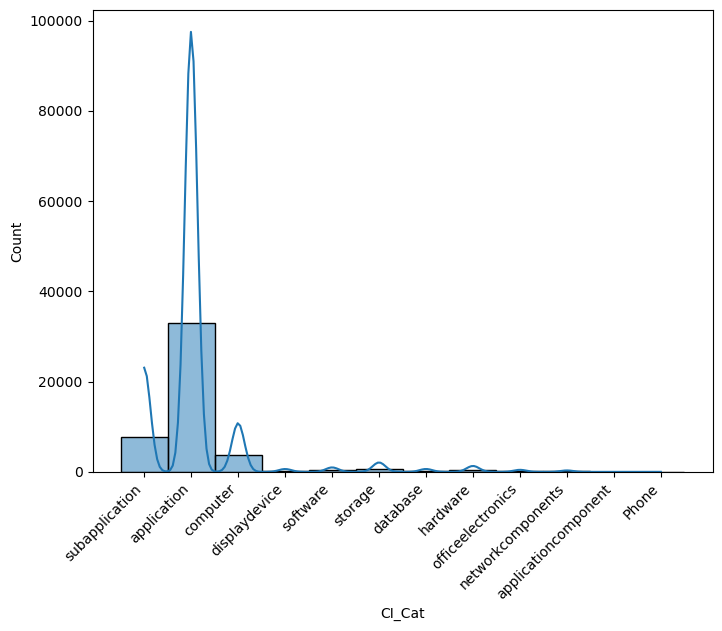

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x=df['CI_Cat'], kde=True)
plt.xticks(rotation=45,ha="right")
plt.show()

- There are a few outliers at the high end.
- The median is slightly higher than the mode, which suggests that the data is somewhat skewed to the right.

In [34]:
df.CI_Subcat.mode()

0    Server Based Application
Name: CI_Subcat, dtype: object

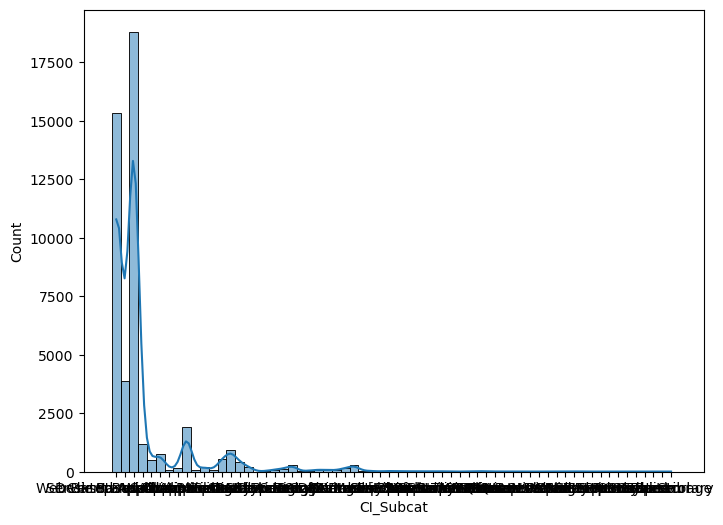

In [35]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x=df['CI_Subcat'], kde=True)
plt.show()

- The distribution of the CI_Subcat column is skewed to the right.
- There is a small number of outliers at the high end, representing CI_Subcat values of In Progress and Not Started.

In [36]:
df.No_of_Related_Interactions.mode()

0    1
Name: No_of_Related_Interactions, dtype: object

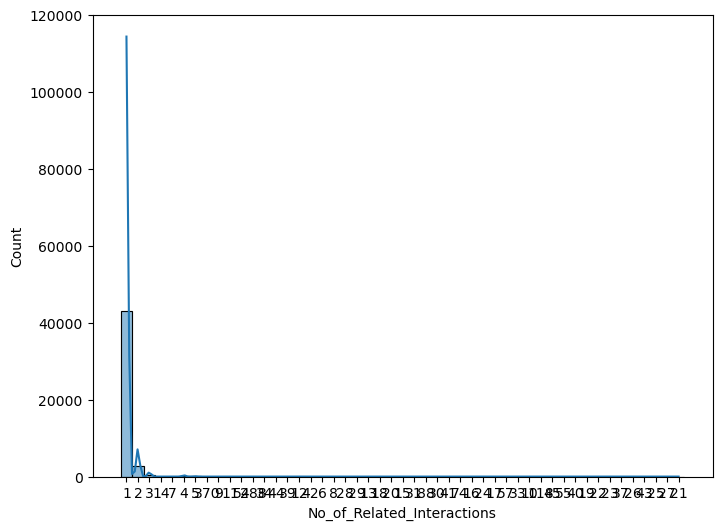

In [37]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x=df['No_of_Related_Interactions'], kde=True)
plt.show()

In [38]:
df.Priority.mode()

0    4
Name: Priority, dtype: object

In [39]:
df.Impact.mode()

0    4
Name: Impact, dtype: object

In [40]:
df.No_of_Related_Changes.mode()

0    1
Name: No_of_Related_Changes, dtype: object

In [41]:
df.No_of_Related_Incidents.mode()

0    1
Name: No_of_Related_Incidents, dtype: object

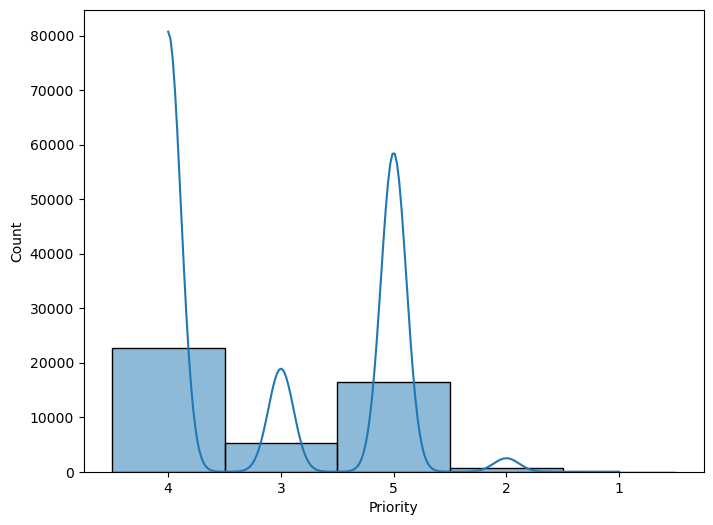

In [42]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x=df['Priority'], kde=True)
plt.show()

- The distribution of the data is skewed to the right, with most values between 20 and 50.
- There are a few outliers at the high end, with values above 100.

In [43]:
df.loc[df.CI_Cat.isnull()==True,'CI_Cat']='application'
df.loc[df.CI_Subcat.isnull()==True,'CI_Subcat']='Server Based Application'
df.loc[df.Impact.isnull()==True,'Impact']=0
df.loc[df.Priority.isnull()==True,'Priority']=0
df.loc[df.No_of_Related_Incidents.isnull()==True,'No_of_Related_Incidents']=0
df.loc[df.No_of_Related_Changes.isnull()==True,'No_of_Related_Changes']=1
df.loc[df.No_of_Related_Interactions.isnull()==True,'No_of_Related_Interactions']=1

In [44]:
df.isnull().sum()

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Impact                        0
Urgency                       0
Priority                      0
Category                      0
Open_Time                     0
No_of_Related_Interactions    0
No_of_Related_Incidents       0
No_of_Related_Changes         0
dtype: int64

In [45]:
df.dtypes

CI_Name                       object
CI_Cat                        object
CI_Subcat                     object
WBS                           object
Incident_ID                   object
Impact                        object
Urgency                       object
Priority                      object
Category                      object
Open_Time                     object
No_of_Related_Interactions    object
No_of_Related_Incidents       object
No_of_Related_Changes         object
dtype: object

### Changing Data Types

In [46]:
df.Urgency.replace('5 - Very Low',5,inplace=True)

In [47]:
df.Impact=df.Impact.astype('int')
df.Urgency=df.Urgency.astype('int')
df.Priority=df.Priority.astype('int')
df.No_of_Related_Incidents=df.No_of_Related_Incidents.astype('int')
df.No_of_Related_Changes=df.No_of_Related_Changes.astype('int')
df.No_of_Related_Interactions=df.No_of_Related_Interactions.astype('int')

In [48]:
df.dtypes

CI_Name                       object
CI_Cat                        object
CI_Subcat                     object
WBS                           object
Incident_ID                   object
Impact                         int32
Urgency                        int32
Priority                       int32
Category                      object
Open_Time                     object
No_of_Related_Interactions     int32
No_of_Related_Incidents        int32
No_of_Related_Changes          int32
dtype: object

In [49]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,Open_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,4,4,4,incident,05-02-2012 13:32,1,2,1
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,3,3,3,incident,12-03-2012 15:44,1,1,1
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,0,3,0,request for information,29-03-2012 12:36,1,0,1
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,4,4,4,incident,17-07-2012 11:49,1,0,1
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,4,4,4,incident,10-08-2012 11:01,1,0,1


# Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df.CI_Name=label.fit_transform(df.CI_Name)
df.CI_Subcat=label.fit_transform(df.CI_Subcat)
df.Incident_ID=label.fit_transform(df.Incident_ID)
df.CI_Cat=label.fit_transform(df.CI_Cat)
df.Category=label.fit_transform(df.Category)
df.WBS=label.fit_transform(df.WBS)

In [51]:
df1 = df.drop('Open_Time',axis=1)
df1

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,2741,11,57,137,0,4,4,4,1,1,2,1
1,2863,1,57,70,1,3,3,3,1,1,1,1
2,990,1,10,74,2,0,3,0,3,1,0,1
3,2863,1,57,70,3,4,4,4,1,1,0,1
4,2863,1,57,70,4,4,4,4,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
46601,2455,1,45,59,46601,4,4,4,1,1,0,1
46602,2453,1,45,59,46602,4,4,4,1,1,0,1
46603,1096,3,21,73,46603,5,5,5,1,1,0,1
46604,2834,1,57,59,46604,4,4,4,1,1,0,1


In [52]:
df1.corr()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
CI_Name,1.000000,0.168450,0.955859,-0.106713,0.019721,0.105719,0.120099,0.110714,0.072736,-0.016371,-0.000181,0.008149
CI_Cat,0.168450,1.000000,0.199085,-0.217976,0.031818,-0.017056,-0.048221,-0.015546,-0.105516,-0.012490,-0.017156,0.003699
CI_Subcat,0.955859,0.199085,1.000000,-0.124059,0.031646,0.087709,0.095688,0.093952,0.030193,-0.013018,0.000559,0.009196
WBS,-0.106713,-0.217976,-0.124059,1.000000,0.003462,0.012250,0.023112,0.009859,0.116663,-0.008254,0.026899,-0.007060
Incident_ID,0.019721,0.031818,0.031646,0.003462,1.000000,-0.023730,-0.033662,-0.023503,-0.054123,-0.016865,0.016960,-0.003545
Impact,0.105719,-0.017056,0.087709,0.012250,-0.023730,1.000000,0.856382,0.995996,0.381465,-0.014217,-0.048593,-0.005418
Urgency,0.120099,-0.048221,0.095688,0.023112,-0.033662,0.856382,1.000000,0.863380,0.470580,-0.022843,-0.064815,-0.007460
Priority,0.110714,-0.015546,0.093952,0.009859,-0.023503,0.995996,0.863380,1.000000,0.380427,-0.017526,-0.048866,-0.005302
Category,0.072736,-0.105516,0.030193,0.116663,-0.054123,0.381465,0.470580,0.380427,1.000000,-0.008890,-0.027583,-0.006441
No_of_Related_Interactions,-0.016371,-0.012490,-0.013018,-0.008254,-0.016865,-0.014217,-0.022843,-0.017526,-0.008890,1.000000,0.103612,0.008291


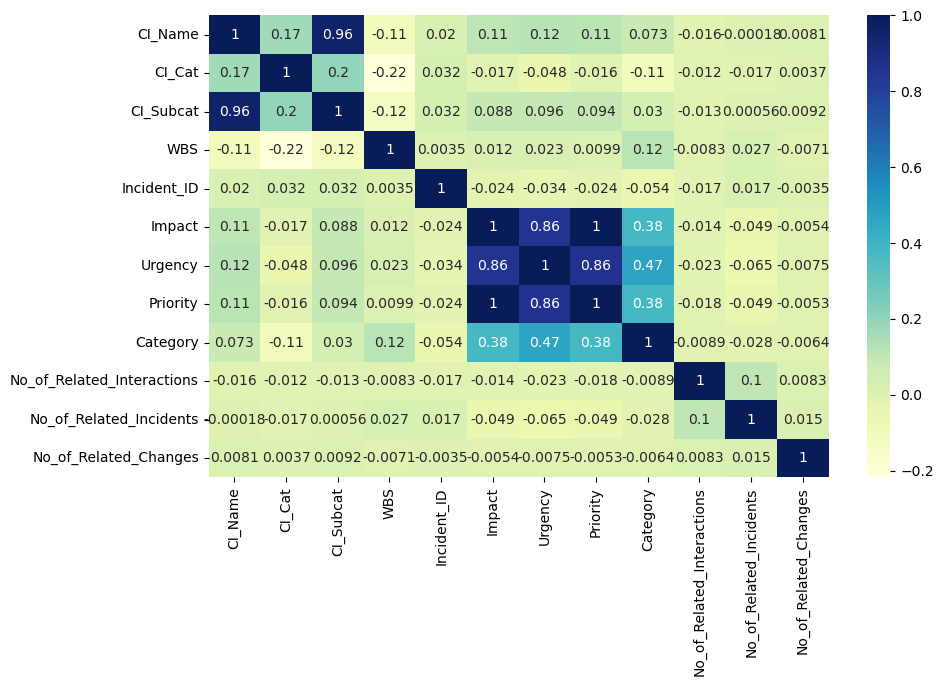

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True,cmap='YlGnBu')
plt.show()

We can see that Imapact,Urgency,category these features are corelated with target feature i.e Priority

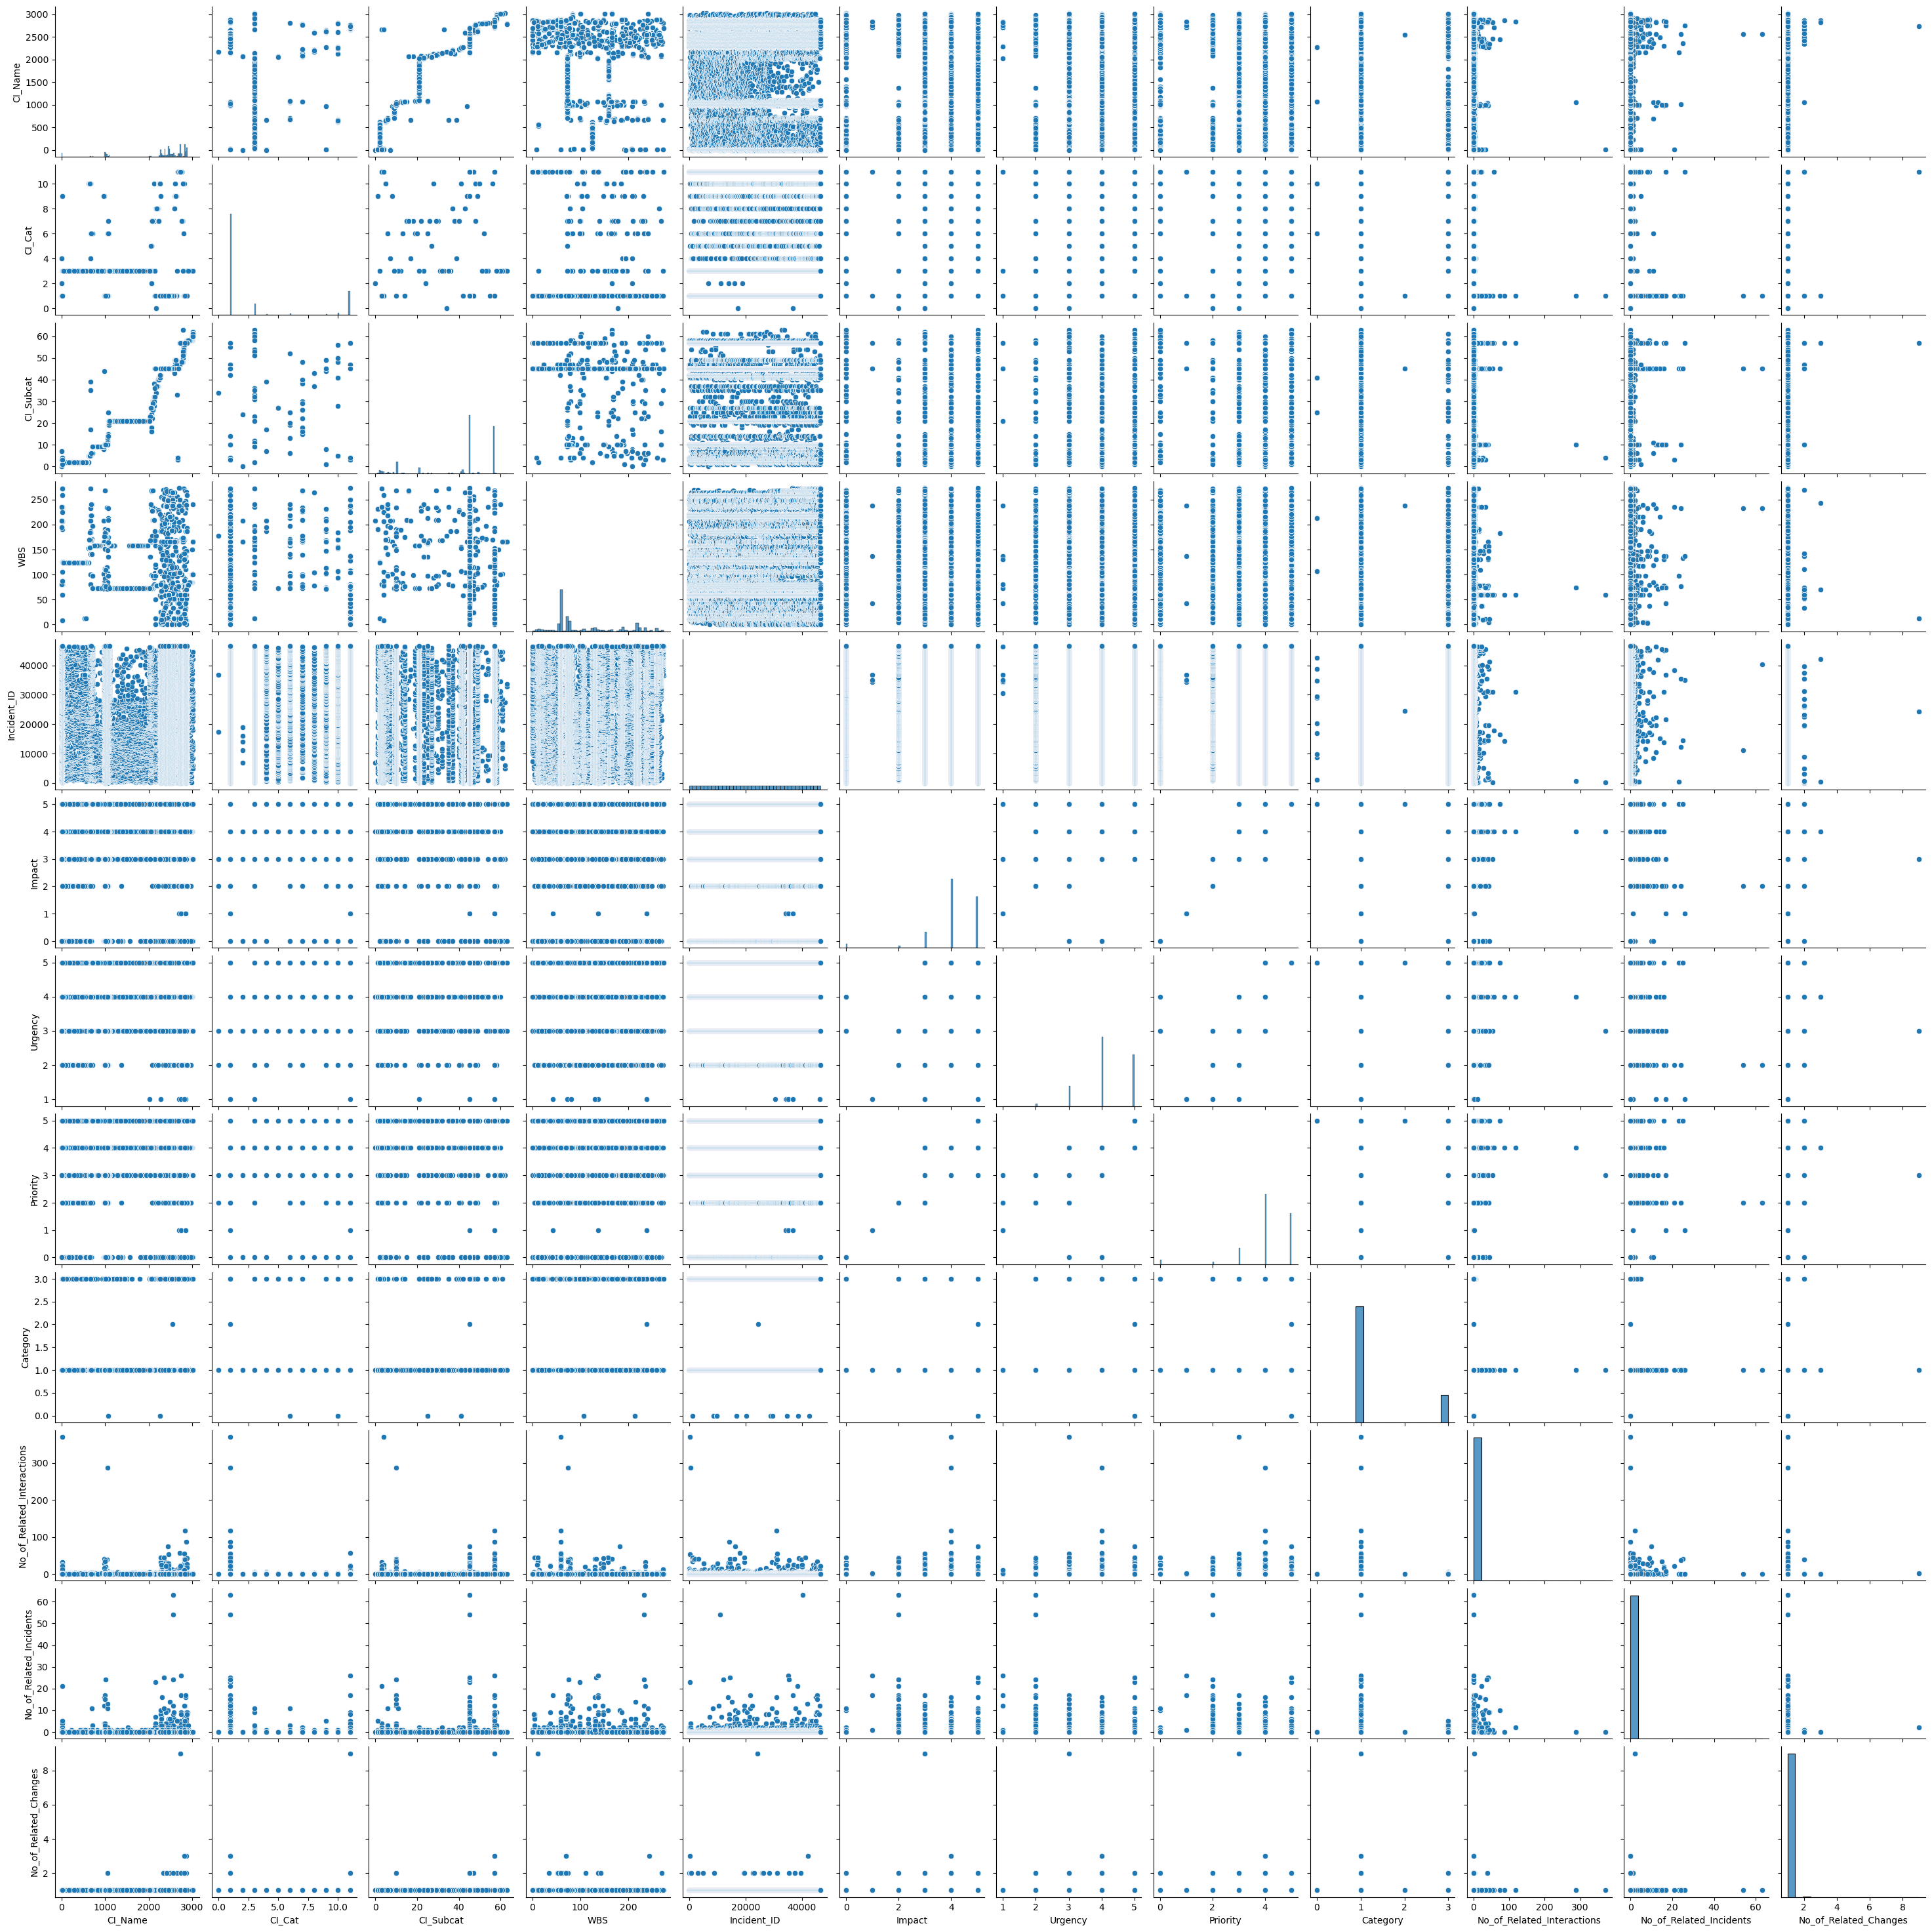

In [54]:
sns.pairplot(df1)
plt.show()

# Outlier Handling

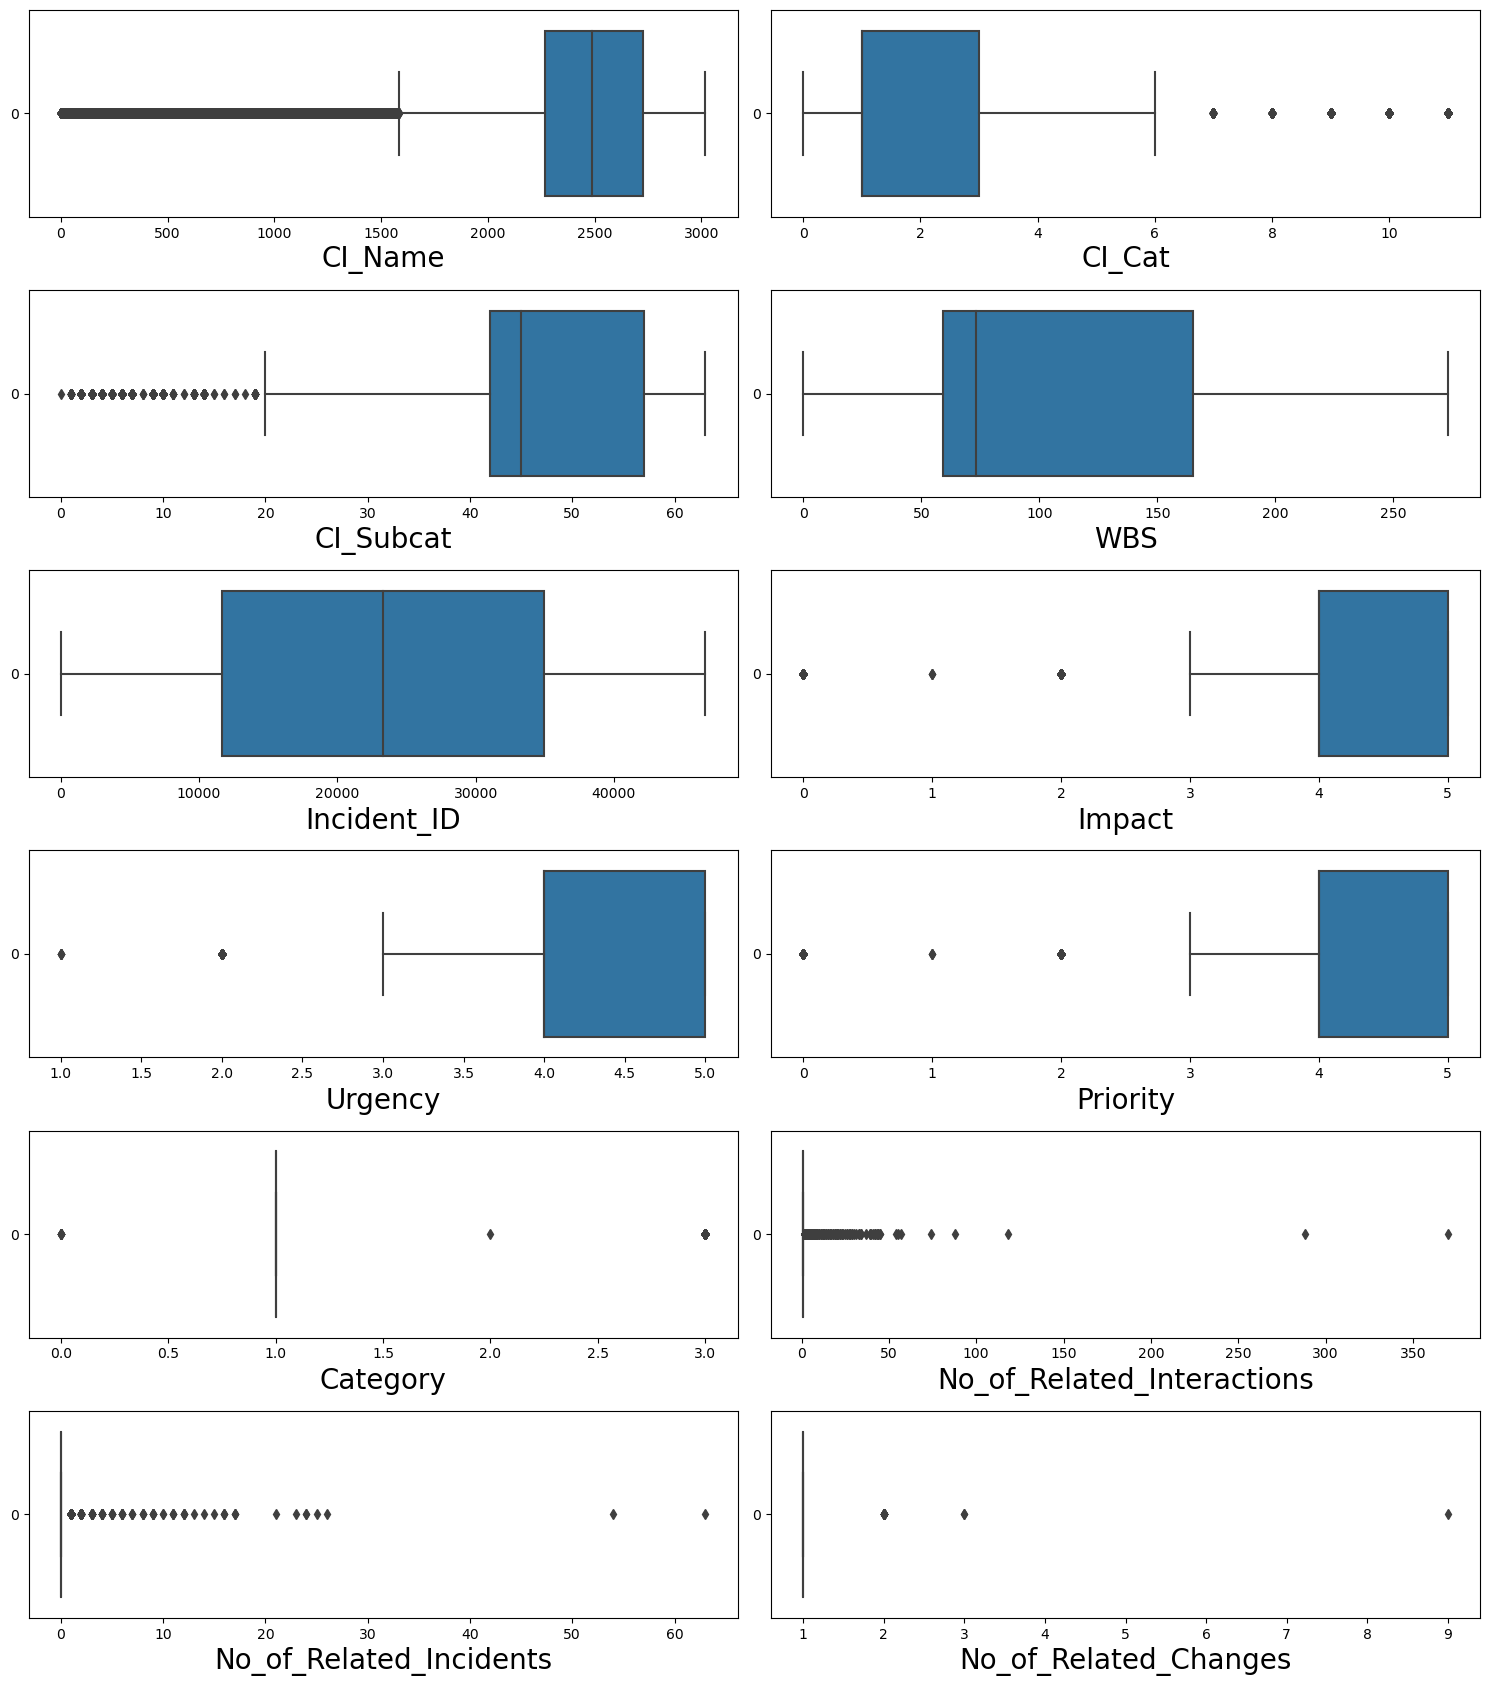

In [55]:
plt.figure(figsize=(15,50))
plotnumber = 1

for column in df1:
    if plotnumber<=35 :
        ax = plt.subplot(18,2,plotnumber)
        sns.boxplot(df[column],orient='h') 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [56]:
df1.dtypes

CI_Name                       int32
CI_Cat                        int32
CI_Subcat                     int32
WBS                           int32
Incident_ID                   int32
Impact                        int32
Urgency                       int32
Priority                      int32
Category                      int32
No_of_Related_Interactions    int32
No_of_Related_Incidents       int32
No_of_Related_Changes         int32
dtype: object

In [57]:
df1

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,2741,11,57,137,0,4,4,4,1,1,2,1
1,2863,1,57,70,1,3,3,3,1,1,1,1
2,990,1,10,74,2,0,3,0,3,1,0,1
3,2863,1,57,70,3,4,4,4,1,1,0,1
4,2863,1,57,70,4,4,4,4,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
46601,2455,1,45,59,46601,4,4,4,1,1,0,1
46602,2453,1,45,59,46602,4,4,4,1,1,0,1
46603,1096,3,21,73,46603,5,5,5,1,1,0,1
46604,2834,1,57,59,46604,4,4,4,1,1,0,1


In [58]:
IQR_CI_Name = stats.iqr(df1.CI_Name)

In [59]:
Q1_CI_Name = np.percentile(df1.CI_Name,25)
Q3_CI_Name = np.percentile(df1.CI_Name,75)
LB_CI_Name = Q1_CI_Name - 1.5 * IQR_CI_Name
UB_CI_Name = Q3_CI_Name + 1.5 * IQR_CI_Name

In [60]:
df1.loc[df1.CI_Name>UB_CI_Name,'CI_Name']

Series([], Name: CI_Name, dtype: int32)

In [61]:
df1.loc[df1.CI_Name<LB_CI_Name,'CI_Name']

2         990
18       1050
53         17
71         17
138        20
         ... 
46583      12
46585     674
46597     664
46603    1096
46605     674
Name: CI_Name, Length: 8698, dtype: int32

In [62]:
df1[(df1.CI_Name<UB_CI_Name)&(df1.CI_Name>LB_CI_Name)]

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,2741,11,57,137,0,4,4,4,1,1,2,1
1,2863,1,57,70,1,3,3,3,1,1,1,1
3,2863,1,57,70,3,4,4,4,1,1,0,1
4,2863,1,57,70,4,4,4,4,1,1,0,1
5,2863,1,57,70,5,4,4,4,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
46599,2874,1,57,258,46599,4,4,4,1,1,0,1
46600,2454,1,45,59,46600,4,4,4,1,1,0,1
46601,2455,1,45,59,46601,4,4,4,1,1,0,1
46602,2453,1,45,59,46602,4,4,4,1,1,0,1


In [63]:
((46606-37907)/46606)*100

18.664978758099814

In [64]:
IQR_CI_Cat = stats.iqr(df1.CI_Cat)
Q1_CI_Cat = np.percentile(df1.CI_Cat,25)
Q3_CI_Cat = np.percentile(df1.CI_Cat,75)
LB_CI_Cat = Q1_CI_Cat - 1.5 * IQR_CI_Cat
UB_CI_Cat = Q3_CI_Cat + 1.5 * IQR_CI_Cat

In [65]:
df1.loc[df1.CI_Cat>UB_CI_Cat,'CI_Cat']

0        11
16       11
17       11
24       11
25       11
         ..
46588    11
46589    11
46592    11
46594    11
46595    11
Name: CI_Cat, Length: 9077, dtype: int32

In [66]:
df1.loc[df1.CI_Cat<LB_CI_Cat,'CI_Cat']

Series([], Name: CI_Cat, dtype: int32)

In [67]:
df1[(df1.CI_Cat<UB_CI_Cat)&(df1.CI_Cat>LB_CI_Cat)]

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
1,2863,1,57,70,1,3,3,3,1,1,1,1
2,990,1,10,74,2,0,3,0,3,1,0,1
3,2863,1,57,70,3,4,4,4,1,1,0,1
4,2863,1,57,70,4,4,4,4,1,1,0,1
5,2863,1,57,70,5,4,4,4,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
46600,2454,1,45,59,46600,4,4,4,1,1,0,1
46601,2455,1,45,59,46601,4,4,4,1,1,0,1
46602,2453,1,45,59,46602,4,4,4,1,1,0,1
46603,1096,3,21,73,46603,5,5,5,1,1,0,1


In [68]:
((46606-37087)/46606)*100

20.424408874393855

# Feature Selection

In [69]:
df1.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,2741,11,57,137,0,4,4,4,1,1,2,1
1,2863,1,57,70,1,3,3,3,1,1,1,1
2,990,1,10,74,2,0,3,0,3,1,0,1
3,2863,1,57,70,3,4,4,4,1,1,0,1
4,2863,1,57,70,4,4,4,4,1,1,0,1


In [70]:
X=df1[['CI_Name','CI_Cat','CI_Subcat','WBS','Category','Impact','Urgency','No_of_Related_Incidents']]
y=df1.Priority

In [71]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

## Scaling

In [72]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# Model Creation

## Support Vector Classifier

In [73]:
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf',C=10,gamma=0.1).fit(X_train,y_train)

In [74]:
y_predict_svm = rbf_svc.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(classification_report(y_test,y_predict_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       0.00      0.00      0.00         1
           2       0.96      1.00      0.98       227
           3       1.00      1.00      1.00      1611
           4       1.00      1.00      1.00      6746
           5       1.00      1.00      1.00      4957

    accuracy                           1.00     13982
   macro avg       0.83      0.83      0.83     13982
weighted avg       1.00      1.00      1.00     13982



In [76]:
print(accuracy_score(y_test,y_predict_svm))

0.9991417536833072


In [77]:
confusion_matrix(y_test,y_predict_svm)

array([[ 438,    0,    2,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0],
       [   0,    0,  226,    1,    0,    0],
       [   0,    0,    2, 1609,    0,    0],
       [   0,    0,    2,    1, 6742,    1],
       [   0,    0,    2,    0,    0, 4955]], dtype=int64)

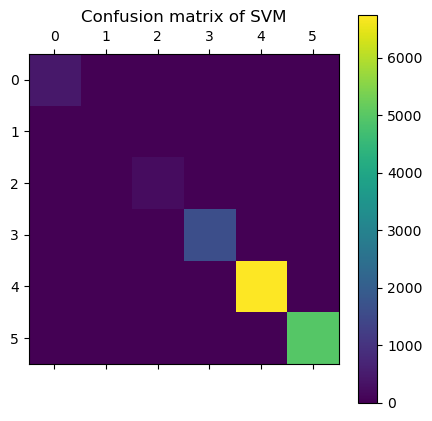

In [78]:
import pylab as pl
cm_svm = confusion_matrix(y_test,y_predict_svm)
pl.matshow(cm_svm)
pl.title('Confusion matrix of SVM')
pl.colorbar()
pl.show()

## Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9997139178944358

In [80]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       0.00      0.00      0.00         1
           2       1.00      0.99      0.99       227
           3       1.00      1.00      1.00      1611
           4       1.00      1.00      1.00      6746
           5       1.00      1.00      1.00      4957

    accuracy                           1.00     13982
   macro avg       0.83      0.83      0.83     13982
weighted avg       1.00      1.00      1.00     13982



In [81]:
y_hat = rf.predict(X_train)
accuracy_score(y_train,y_hat)

1.0

 we are getting good accuracy for training as well as testing. our model is low biased and low variance model

In [82]:
confusion_matrix(y_test,y_pred_rf)

array([[ 440,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0],
       [   0,    0,  225,    2,    0,    0],
       [   0,    0,    0, 1610,    1,    0],
       [   0,    0,    0,    0, 6746,    0],
       [   0,    0,    0,    0,    0, 4957]], dtype=int64)

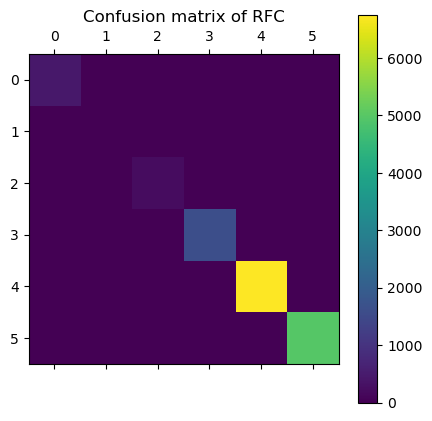

In [83]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
pl.matshow(cm_rf)
pl.title('Confusion matrix of RFC')
pl.colorbar()
pl.show()

## Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
multi = LogisticRegression(multi_class='multinomial', solver = 'newton-cg',max_iter=100)
multi.fit(X_train,y_train)
y_pred_lr = multi.predict(X_test)

In [85]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       0.00      0.00      0.00         1
           2       1.00      0.98      0.99       227
           3       1.00      1.00      1.00      1611
           4       1.00      1.00      1.00      6746
           5       1.00      1.00      1.00      4957

    accuracy                           1.00     13982
   macro avg       0.83      0.83      0.83     13982
weighted avg       1.00      1.00      1.00     13982



In [86]:
accuracy_score(y_test,y_pred_lr)

0.9995708768416536

In [87]:
y_tp = multi.predict(X_train)
accuracy_score(y_train,y_tp)

0.9998773908778813

In [88]:
confusion_matrix(y_test,y_pred_lr)

array([[ 440,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0],
       [   0,    3,  222,    2,    0,    0],
       [   0,    0,    0, 1611,    0,    0],
       [   0,    0,    0,    0, 6746,    0],
       [   0,    0,    0,    0,    0, 4957]], dtype=int64)

## Decision Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [90]:
y_predict_dtree = model_dtree.predict(X_test)
print(classification_report(y_test,y_predict_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00       227
           3       1.00      1.00      1.00      1611
           4       1.00      1.00      1.00      6746
           5       1.00      1.00      1.00      4957

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



In [91]:
accuracy_score(y_test,y_predict_dtree)

1.0

In [92]:
confusion_matrix(y_test,y_predict_dtree)

array([[ 440,    0,    0,    0,    0,    0],
       [   0,    1,    0,    0,    0,    0],
       [   0,    0,  227,    0,    0,    0],
       [   0,    0,    0, 1611,    0,    0],
       [   0,    0,    0,    0, 6746,    0],
       [   0,    0,    0,    0,    0, 4957]], dtype=int64)

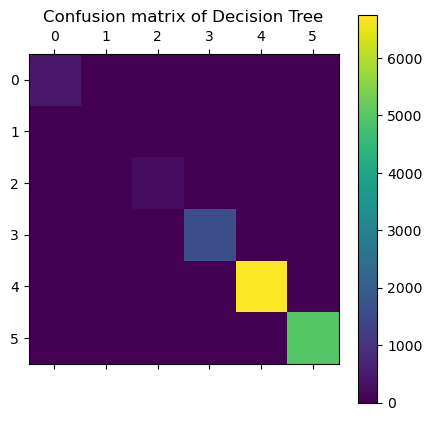

In [93]:
cm_dt = confusion_matrix(y_test,y_predict_dtree)
pl.matshow(cm_dt)
pl.title('Confusion matrix of Decision Tree')
pl.colorbar()
pl.show()

## XGBoost Classifier

In [94]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [95]:
y_predict_xgb = model_xgb.predict(X_test)
print(classification_report(y_test,y_predict_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       0.00      0.00      0.00         1
           2       1.00      0.99      0.99       227
           3       1.00      1.00      1.00      1611
           4       1.00      1.00      1.00      6746
           5       1.00      1.00      1.00      4957

    accuracy                           1.00     13982
   macro avg       0.83      0.83      0.83     13982
weighted avg       1.00      1.00      1.00     13982



In [96]:
print(accuracy_score(y_test,y_predict_xgb))

0.9997139178944358


In [97]:
confusion_matrix(y_test,y_predict_xgb)

array([[ 440,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0],
       [   0,    0,  225,    2,    0,    0],
       [   0,    0,    0, 1610,    1,    0],
       [   0,    0,    0,    0, 6746,    0],
       [   0,    0,    0,    0,    0, 4957]], dtype=int64)

## Model Comparision Report

|S.No| Algorithm            |Accuracy Score|     |Precision|Recall|f1-score|support|
|----|----------------------|--------------|-----|---------|------|--------|-------|
|1|Support Vector Classifier  |0.999141|0|1.00|1.00|1.00|440|
| |                        |        |1|0.00|0.00|0.00|1|
| |                        |        |2|0.96|1.00|0.98|227|
| |                        |        |3|1.00|1.00|1.00|1611|
| |                        |        |4|1.00|1.00|1.00|6746|
| |                        |        |5|1.00|1.00|1.00|4957|
|2|Random Forest Classifier|0.999713|0|1.00|1.00|1.00|440|
| |                        |        |1|0.00|0.00|0.00|1|
| |                        |        |2|1.00|0.99|0.99|227|
| |                        |        |3|1.00|1.00|1.00|1611|
| |                        |        |4|1.00|1.00|1.00|6746|
| |                        |        |5|1.00|1.00|1.00|4957|
|3|Logistic Regression|0.999570     |0|1.00|1.00|1.00|440|
| |                        |        |1|0.00|0.00|0.00|1|
| |                        |        |2|1.00|0.98|0.99|227|
| |                        |        |3|1.00|1.00|1.00|1611|
| |                        |        |4|1.00|1.00|1.00|6746|
| |                        |        |5|1.00|1.00|1.00|4957|
|4|Decision Tree Classifier|1.0                |0|1.00|1.00|1.00|440|
| |                        |        |1|1.00|1.00|1.00|1|
| |                        |        |2|1.00|1.00|1.00|227|
| |                        |        |3|1.00|1.00|1.00|1611|
| |                        |        |4|1.00|1.00|1.00|6746|
| |                        |        |5|1.00|1.00|1.00|4957|
|5|XGBoost Classifier|0.999713      |0|1.00|1.00|1.00|440|
| |                        |        |1|0.00|0.00|0.00|1|
| |                        |        |2|1.00|0.99|0.99|227|
| |                        |        |3|1.00|1.00|1.00|1611|
| |                        |        |4|1.00|1.00|1.00|6746|
| |                        |        |5|1.00|1.00|1.00|4957|


- As seen in above Decision Tree Classifier have the best accuracy score and it given 100% accuracy.
- Random Forest Classifier and XGBoost Classifier have the same accuracy scores and these are considered as the second most good models.

# Business Case-2

### Forecast the incident volume in different fields , quarterly and annual.

In [98]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,Open_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,2741,11,57,137,0,4,4,4,1,05-02-2012 13:32,1,2,1
1,2863,1,57,70,1,3,3,3,1,12-03-2012 15:44,1,1,1
2,990,1,10,74,2,0,3,0,3,29-03-2012 12:36,1,0,1
3,2863,1,57,70,3,4,4,4,1,17-07-2012 11:49,1,0,1
4,2863,1,57,70,4,4,4,4,1,10-08-2012 11:01,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,2455,1,45,59,46601,4,4,4,1,31-03-2014 16:23,1,0,1
46602,2453,1,45,59,46602,4,4,4,1,31-03-2014 15:03,1,0,1
46603,1096,3,21,73,46603,5,5,5,1,31-03-2014 15:28,1,0,1
46604,2834,1,57,59,46604,4,4,4,1,31-03-2014 15:35,1,0,1


In [99]:
# Coverting all the values in proper Datetime format
import datetime
from datetime import datetime
for i in range(len(df.Open_Time)):
    if (df.Open_Time[i][1]=='/'):
        df.Open_Time[i]=datetime.strptime(df.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (df.Open_Time[i][2]=='/'):
        df.Open_Time[i] =datetime.strptime(df.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        df.Open_Time[i] =datetime.strptime(df.Open_Time[i],'%d-%m-%Y %H:%M').date()    

In [100]:
df2=df[['Incident_ID','Open_Time']]
df2.head()

,Incident_ID,Open_Time
0,0,2012-02-05
1,1,2012-03-12
2,2,2012-03-29
3,3,2012-07-17
4,4,2012-08-10


In [101]:
# Adding a new column which will have the number of tickets per day
df2['No_Incidents']=df2.groupby('Open_Time')['Incident_ID'].transform('count')

In [102]:
df2.head()

,Incident_ID,Open_Time,No_Incidents
0,0,2012-02-05,1
1,1,2012-03-12,1
2,2,2012-03-29,1
3,3,2012-07-17,1
4,4,2012-08-10,2


In [103]:
df2.drop('Incident_ID',axis=1,inplace=True)
df2.drop_duplicates(inplace=True)

In [104]:
df2.head()

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2


In [105]:
df2=df2.set_index('Open_Time')
df2.index=pd.to_datetime(df2.index)
df2.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [106]:
# Making a new Series with frequency as Day
df2 = df2['No_Incidents']
df3 = df2.asfreq('D')
df3.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

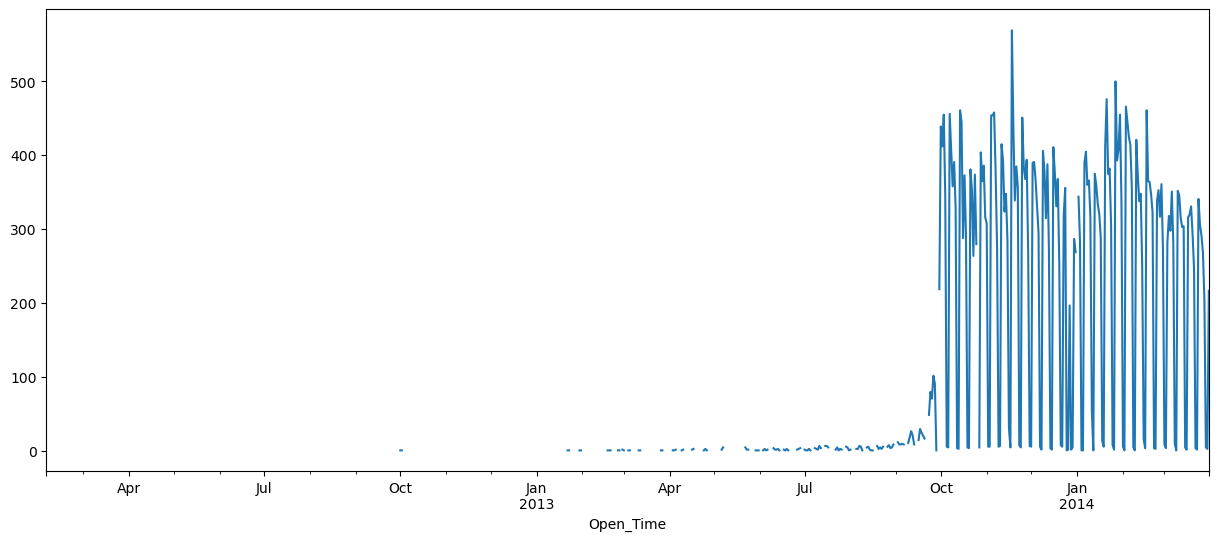

In [107]:
df3.plot(figsize=(15,6))
plt.show()

Since not many tickets before October 2013, we consider only the latter values.

In [108]:
df2_oct13=df3[df3.index>datetime(2013,10,1)]

In [109]:
df2_oct13

Open_Time
2013-10-02    412.0
2013-10-03    455.0
2013-10-04    345.0
2013-10-05      6.0
2013-10-06      5.0
              ...  
2014-03-27    269.0
2014-03-28    205.0
2014-03-29      5.0
2014-03-30      3.0
2014-03-31    217.0
Freq: D, Name: No_Incidents, Length: 181, dtype: float64

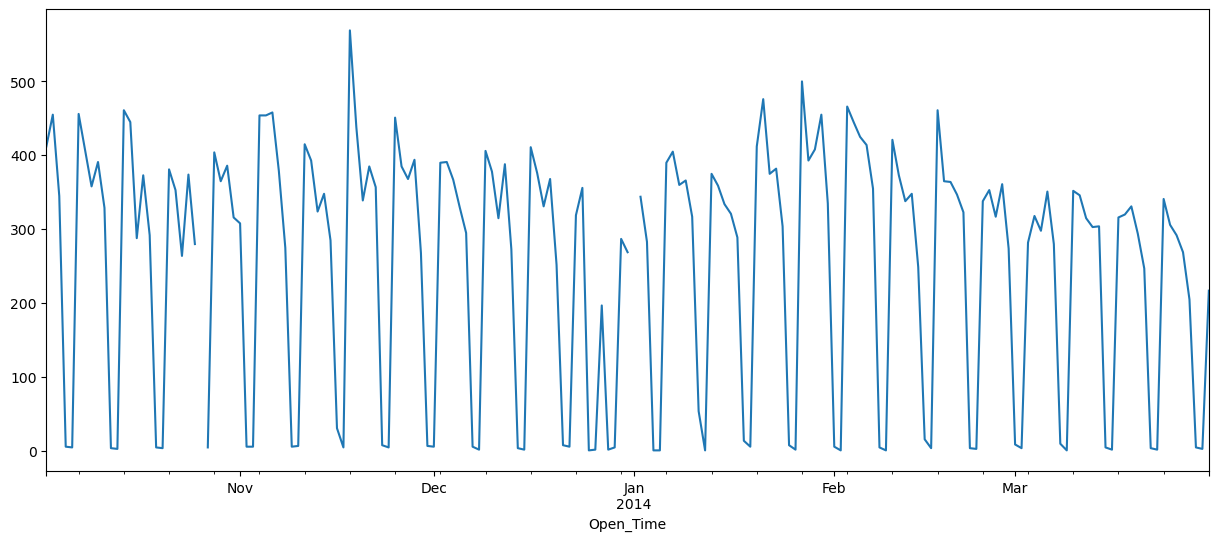

In [110]:
df2_oct13.plot(figsize=(15,6))
plt.show()

## Model Creation

## ARIMA 

For ARIMA we don't need to convert it into stationary wave.

In [111]:
train=df2_oct13[:11000] 
test=df2_oct13[11000:]

In [112]:
from statsmodels.tsa.arima.model import ARIMA

In [113]:
model_arima = ARIMA(train, order=(3,1,3))
model_arima_fit = model_arima.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = p,d,q (Randomly giving values for p,d,q)
- p - auto regressive model
- d - how many times differencing is done (intergrated order)
- q - moving average model

### Model Evaluation

In [114]:
print(model_arima_fit.aic) 

2232.828680880269


 Akaike Information Criteria whichever value will give less aic value that value will be considered as optimal value.

In [115]:
forecasting_9 = model_arima_fit.forecast(steps=9)  # forecasting for next 9 months

- forecast() - forecasts data at a specific future point in time
- predict() - refers to future data in general
- The result of the forecast() function is an array containing the forecast value, 
  the standard error of the forecast, and the confidence interval information. we are only interested in the first element of     this forecast.. so index 0 to take 1st value.

In [116]:
forecasting_9

2014-04-01    170.948895
2014-04-02     80.915060
2014-04-03    261.361450
2014-04-04    327.984032
2014-04-05    152.587611
2014-04-06    185.486550
2014-04-07    358.994501
2014-04-08    256.382748
2014-04-09    133.502536
Freq: D, Name: predicted_mean, dtype: float64

In [117]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,4) #values of p,d,q (range can be from 0 to 5 for large datasets)

pdq = list(itertools.product(p,d,q)) # is used to find the cartesian product from the given iterator,
pdq  #list of all possible combinations of p,d,q

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 0),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3)]

In [118]:
import warnings
warnings.filterwarnings('ignore')
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
          
            
    except:
        continue
#take lowest aic score    

(0, 0, 0) 2346.034180003422
(0, 0, 1) 2282.704307754346
(0, 0, 2) 2279.2095836019726
(0, 0, 3) 2246.661261534479
(0, 1, 0) 2383.5524236196097
(0, 1, 1) 2339.003291472857
(0, 1, 2) 2274.946820356674
(0, 1, 3) 2272.151020362716
(0, 2, 0) 2494.6408454370794
(0, 2, 1) 2378.332196822915
(0, 2, 2) 2339.8051712411207
(0, 2, 3) 2275.4902440621327
(0, 3, 0) 2642.3955944545633
(0, 3, 1) 2488.408417004128
(0, 3, 2) 2377.849853755576
(0, 3, 3) 2348.4631410068114
(1, 0, 0) 2327.1815378796928
(1, 0, 1) 2282.1848205368333
(1, 0, 2) 2266.9660404379256
(1, 0, 3) 2265.9724475499443
(1, 1, 0) 2385.559272727397
(1, 1, 1) 2319.5138999956707
(1, 1, 2) 2274.6384250993906
(1, 1, 3) 2255.3767231502125
(1, 2, 0) 2485.7991824196006
(1, 2, 1) 2380.329995677949
(1, 2, 2) 2359.681619877608
(1, 2, 3) 2275.4156071869156
(1, 3, 0) 2615.2229970411067
(1, 3, 1) 2479.9840660249624
(1, 3, 2) 2486.1698043081624
(1, 3, 3) 2327.948676012592
(2, 0, 0) 2276.8994376064425
(2, 0, 1) 2274.6647775783176
(2, 0, 2) 2261.499603388398

In [119]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(3,1,3))
model_arima_fit = model_arima.fit()

In [120]:
forecast = model_arima_fit.forecast(steps=100)
forecast

2014-04-01    170.948895
2014-04-02     80.915060
2014-04-03    261.361450
2014-04-04    327.984032
2014-04-05    152.587611
                 ...    
2014-07-05    159.116063
2014-07-06    202.163329
2014-07-07    364.917875
2014-07-08    249.157617
2014-07-09    138.159119
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

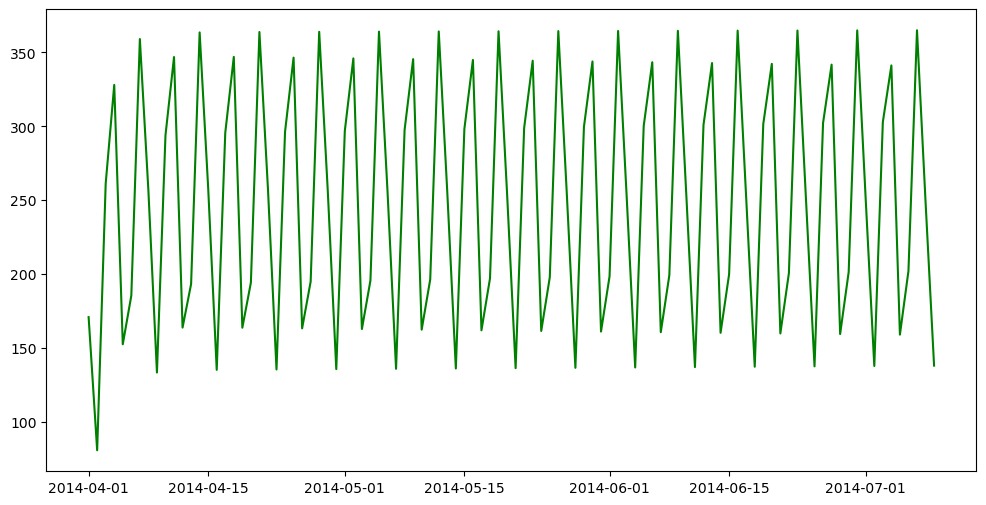

In [121]:
plt.figure(figsize=(12,6))
plt.plot(forecast,color='green')#line plot for prediction
plt.show()

# Business Case-3

### Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets

In [122]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,Open_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,2741,11,57,137,0,4,4,4,1,2012-02-05,1,2,1
1,2863,1,57,70,1,3,3,3,1,2012-03-12,1,1,1
2,990,1,10,74,2,0,3,0,3,2012-03-29,1,0,1
3,2863,1,57,70,3,4,4,4,1,2012-07-17,1,0,1
4,2863,1,57,70,4,4,4,4,1,2012-08-10,1,0,1


In [123]:
# Selecting the predictors
X1 = df[['CI_Subcat','CI_Cat','WBS','Priority','Category','Urgency','Impact',
           'No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = df.No_of_Related_Changes

In [124]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=3)

In [125]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X1_train=scale.fit_transform(X1_train)
X1_test=scale.transform(X1_test)

# Model Creation

## Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier
model1_dtree=DecisionTreeClassifier()
model1_dtree.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [127]:
y1_predict_dtree = model1_dtree.predict(X1_test)
print(classification_report(y1_test,y1_predict_dtree))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13973
           2       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         1

    accuracy                           1.00     13982
   macro avg       0.33      0.33      0.33     13982
weighted avg       1.00      1.00      1.00     13982



In [128]:
accuracy_score(y1_test,y1_predict_dtree)

0.9992847947360892

In [129]:
confusion_matrix(y1_test,y1_predict_dtree)

array([[13972,     1,     0],
       [    8,     0,     0],
       [    1,     0,     0]], dtype=int64)

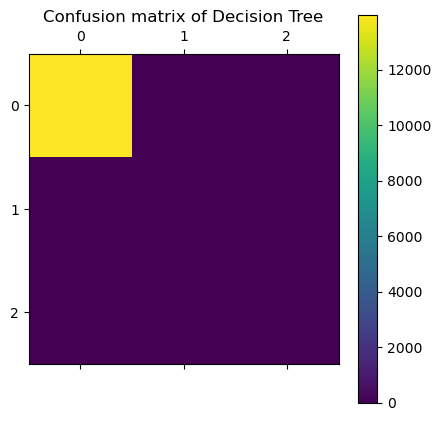

In [130]:
cm_dt1 = confusion_matrix(y1_test,y1_predict_dtree)
pl.matshow(cm_dt1)
pl.title('Confusion matrix of Decision Tree')
pl.colorbar()
pl.show()

## Random Forest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier
model1_rf = RandomForestClassifier()
model1_rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [132]:
y1_predict_rf = model1_rf.predict(X1_test)
print(classification_report(y1_test,y1_predict_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13973
           2       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         1

    accuracy                           1.00     13982
   macro avg       0.33      0.33      0.33     13982
weighted avg       1.00      1.00      1.00     13982



In [133]:
print(accuracy_score(y1_test,y1_predict_rf))

0.9993563152624804


In [134]:
confusion_matrix(y1_test,y1_predict_rf)

array([[13973,     0,     0],
       [    8,     0,     0],
       [    1,     0,     0]], dtype=int64)

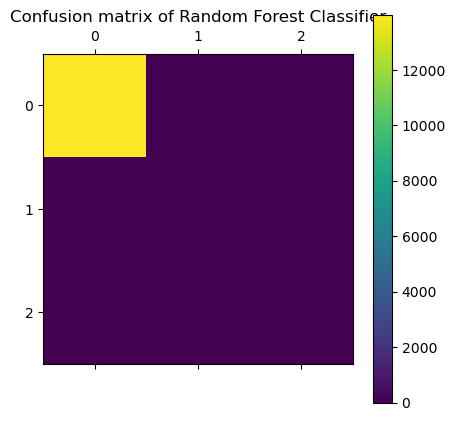

In [135]:
cm_rf1 = confusion_matrix(y1_test,y1_predict_rf)
pl.matshow(cm_rf1)
pl.title('Confusion matrix of Random Forest Classifier')
pl.colorbar()
pl.show()

# Report

## Data Analysis

The data is ordinal, nominal as well as categorical. To analyze the data, various data processing techniques like
Label Encoding and Standardization is used.For training the data and predicting the target, algorithms used are Support 
Vector Machine, Decision Tree, Random Forest, Logistic Regression and XGBoost Classifier. Volume Forecasting is done with 
the help of Statsmodels & Matplotlib.

The analysis is done in three parts:

- Predicting Priorities
- Predicting Request for Change (RFC)
- Forecasting the Incident Volume: The predictor variable is opening time.

## Summary

The project is done with the purpose of:

1. Finding out factors which affects priority and training a model which accurately predicts it so that preventive measures
   can be taken for High Priority Tickets and reassigning can be reduced.
2. Finding out factors which affect RFC and predicting it.
3. Forecasting Incident Volume in the future so that they can be better prepared with resources and technology planning.

## Results

Our Predictive IT Service Management (ITSM) project aims to revolutionize incident management and resource planning at ABC Tech. Leveraging the power of machine learning, we have developed predictive models to enhance various aspects of ITSM processes, including ticket prioritization, incident volume forecasting, and automatic ticket tagging.

For predicting Ticket Priority, Random Forest gives almost 99% accuracy. Predicting RFC accurately is not possible with this
data as the missing value is more than 90% still we have imputed with the mode which is not best practise. 

And Volume Forecasting is visualized with the help of Matplotlib throughout the year.